 Tackle the Titanic dataset. A great place to start is on Kaggle

In [49]:
%pip install tensorflow numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
df= pd.read_csv("Titanic-Dataset.csv")

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.shape

(891, 12)

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
# number of males and females
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

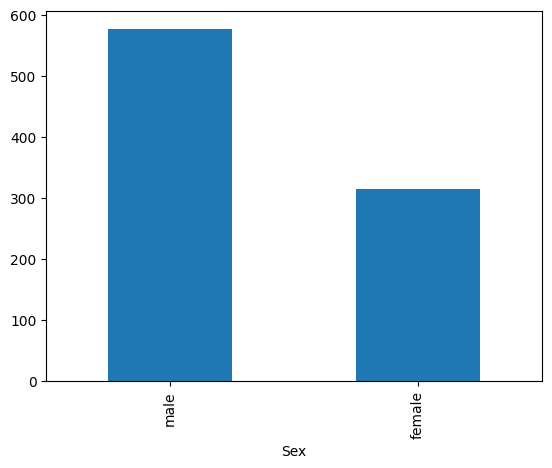

In [60]:
import matplotlib.pyplot as plt
df['Sex'].value_counts().plot(kind='bar')
plt.show()

In [61]:
labels=['1st class','2nd class','3rd class']
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

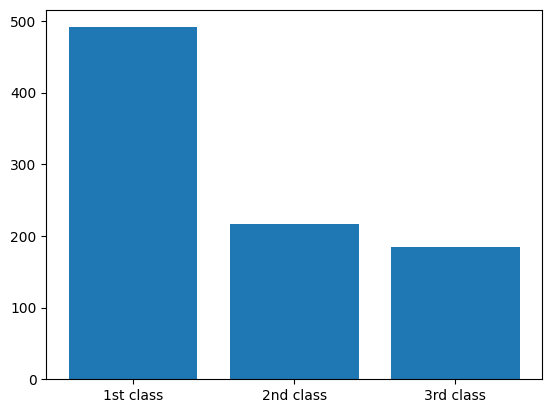

In [62]:
count= df['Pclass'].value_counts()
plt.bar(labels,count)
plt.show()

Survived Count:: Survived
0    549
1    342
Name: count, dtype: int64


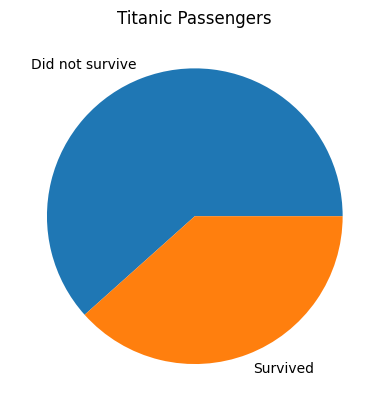

In [63]:
counts = df['Survived'].value_counts()
print(f'Survived Count:: {counts}')
# Custom labels for the pie chart
labels = ['Did not survive', 'Survived']
plt.pie(counts, labels=labels)
plt.title('Titanic Passengers')
plt.show()

In [64]:
# Number of passengers survied from 1 PClass 2 Pclass and 3PClass
df[df['Survived'] == 1]['Pclass'].value_counts()

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [65]:
# percentage of passengers survied from each class
survival_percent = df[df['Survived'] == 1]['Pclass'].value_counts(normalize=True) * 100
print(f'Survivals: {counts}')
print(f'Survival Percentage: {survival_percent}')

Survivals: Survived
0    549
1    342
Name: count, dtype: int64
Survival Percentage: Pclass
1    39.766082
3    34.795322
2    25.438596
Name: proportion, dtype: float64


ValueError: 'labels' must be of length 'x', not 2

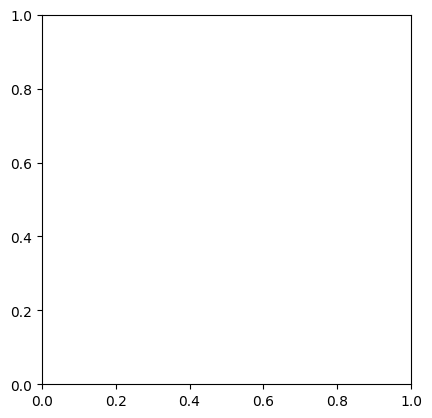

In [66]:
plt.pie(survival_percent,labels=labels)
plt.show()

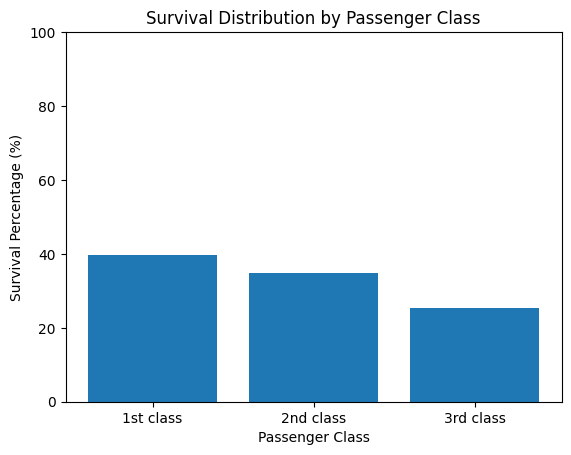

In [ ]:
plt.bar( labels, survival_percent)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Distribution by Passenger Class')
plt.ylim(0, 100)
plt.show()

In [ ]:
# Number of passengers died from 1 PClass 2 Pclass and 3PClass
df[df['Survived'] == 0]['Pclass'].value_counts()

Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [ ]:
death_percent = df[df['Survived'] == 0]['Pclass'].value_counts(normalize=True) * 100
print(f'Deaths: {death_percent}')
print(f'Deaths Percentage: {death_percent}')

Deaths: Pclass
3    67.759563
2    17.668488
1    14.571949
Name: proportion, dtype: float64
Deaths Percentage: Pclass
3    67.759563
2    17.668488
1    14.571949
Name: proportion, dtype: float64


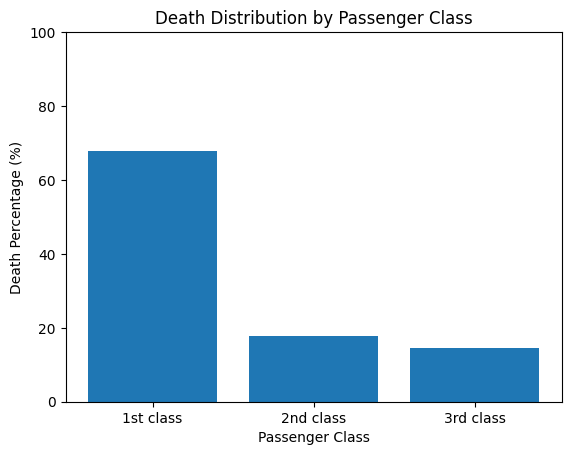

In [ ]:
plt.bar( labels, death_percent)
plt.xlabel('Passenger Class')
plt.ylabel('Death Percentage (%)')
plt.title('Death Distribution by Passenger Class')
plt.ylim(0, 100)
plt.show()

In [73]:
# categorize using Age column based on age groups

bins = [0, 12, 18, 35, 60, float('inf')]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior Citizen']

# Create a new column 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df[['Age','AgeGroup']].head(5)

,Age,AgeGroup
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='AgeGroup'>

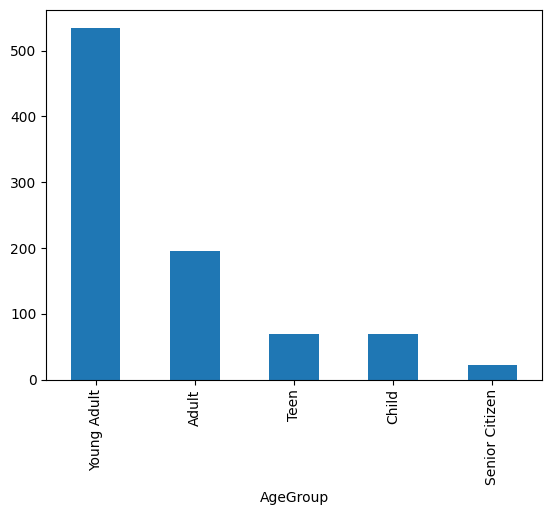

In [98]:
# find passengers in each age group
df['AgeGroup'].value_counts().plot(kind='bar')

In [95]:
# total from each age group
df['AgeGroup'].value_counts()

AgeGroup
Young Adult       535
Adult             195
Teen               70
Child              69
Senior Citizen     22
Name: count, dtype: int64

In [112]:
survived = df[df['Survived']==1]['AgeGroup'].value_counts()
died= df[df['Survived']==0]['AgeGroup'].value_counts()

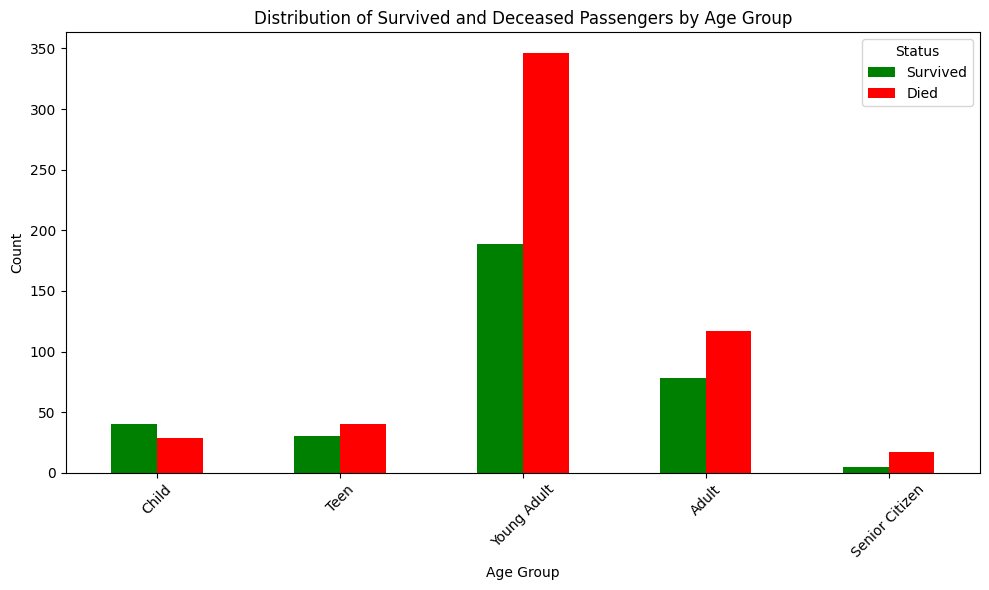

In [114]:
# Combine into a DataFrame for plotting, filling missing values with 0
df_plot = pd.DataFrame({'Survived': survived, 'Died': died}).fillna(0)

# Plot as a grouped bar chart
df_plot.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Distribution of Survived and Deceased Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()